# Time Series

- ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function)
- Trend, Seasonality and Stationary
- AR, MA, ARIMA (Auto-Regressive Integrated Moving Average), SARIMA
- Unit Root


**Key Notes**:
1. When forecasts get harder to predict for longer horizons/future, we could use rolling forecast to accommodate the deteriorating model accuracy

<center>
$S_t = \phi_{21}S_{t-1} + \phi_{22}S_{t-2} + \epsilon_t$
</center>

1. **ACF (k = 2)** = $CORR(S_{t-2}, S_t)$, by default usually is the pearson correlation between $S_t$ and $S_{t-2}$, including both direct effect (PACF) and indirect effect through $S_{t-1}$
2. **PACF (k = 2)** = $\phi_{22}$, the direct effect of $S_{t-2}$ on $S_t$

- ACF plot can help identify the MA order and PACF help identify the AR order
- Seasonality aspect can be indicated by strong ACF/PACF value in lager lags (e.g. High value in early lag, low value in middle, then high spike in lag of 12 months later)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [17]:
dta = sm.datasets.sunspots.load_pandas().data
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]


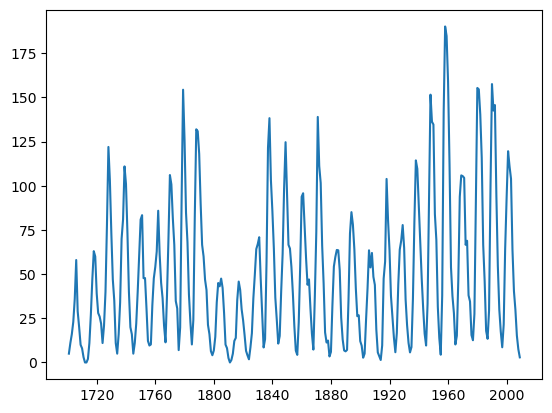

In [28]:
plt.plot(dta.SUNACTIVITY)

**Note**: The graph below shows decaying ACF, this is an indication of Auto Regressive process. A Moving Average problem will have few strong lags and then shut off

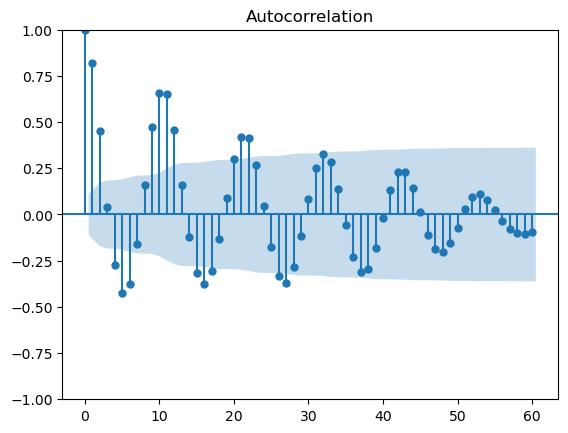

In [23]:
sm.graphics.tsa.plot_acf(dta.SUNACTIVITY, lags=60)
plt.show()

**Note**: PACF chart below suggests we may want to start an AR (Auto Regressive) model with lags on 1,2,3,6,7,8,9

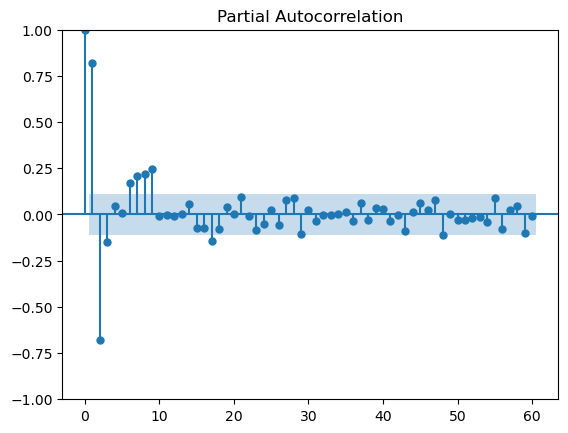

In [25]:
sm.graphics.tsa.plot_pacf(dta.SUNACTIVITY, lags=60, method="ywm")
plt.show()

**Stationary**
- Equilibrium (constant mean)
- Stability (constant variance)

Since stationary time series has constant mean, it also means that its autocovariance does not depend on time (aka. ACT = 0)

ADCF (Augmented Dickey–Fuller test) test can be used to check whether a time series is stationary or not.

Note that in practice, we could often achieve stationary time series through transformations like taking the first difference $(S_t - S_{t-1}, S_{t-1} - S_{t-2}, ...)$

In [26]:
from statsmodels.tsa.stattools import adfuller
adfuller(dta.SUNACTIVITY)


(-2.8377807249381934,
 0.05307642172812075,
 8,
 300,
 {'1%': -3.4523371197407404,
  '5%': -2.871222860740741,
  '10%': -2.571929211111111},
 2430.50034229055)

**Auo-Regressive (AR)** leverages actual value of $t-1$ to inform the value of $t$ while **Moving-Average (MA)** component brings in the prediction error information from $t-1$ to $t$

- The basic ARMA model will be $ARMA(1,1): y_t = \beta_0 + \underset{AR}{\beta_1 y_{t-1}} + \underset{MA}{\phi_1 \epsilon_{t-1}} + \epsilon_t$

ARIMA model helps in situation where an obvious upward/downward trend is present in the data. **I (Integrated)** indicates the order of difference to take to transform the time series into stationary status. Usually $I=1$ will suffice the need

In [27]:
from statsmodels.tsa.arima.model import ARIMA

In [31]:
ARIMA_model = ARIMA(dta.SUNACTIVITY, order = (9,1,2))
res = ARIMA_model.fit()

c:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
c:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
c:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)


In [48]:
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                 ARIMA(9, 1, 2)   Log Likelihood               -1273.034
Date:                Sat, 08 Jul 2023   AIC                           2570.068
Time:                        22:52:37   BIC                           2614.829
Sample:                    12-31-1700   HQIC                          2587.965
                         - 12-31-2008                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5912      1.527      0.387      0.699      -2.402       3.584
ar.L2         -0.2076      0.551     -0.377      0.706      -1.288       0.872
ar.L3         -0.3052      0.378     -0.807      0.4

SRIMA

Reference: [Time Series Talk: Seaonal ARMIA model](https://www.youtube.com/watch?v=WjeGUs6mzXg&list=PLvcbYUQ5t0UHOLnBzl46_Q6QKtFgfMGc3&index=23)

In [39]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [41]:
dta.head()

,SUNACTIVITY
1700-12-31,5.0
1701-12-31,11.0
1702-12-31,16.0
1703-12-31,23.0
1704-12-31,36.0


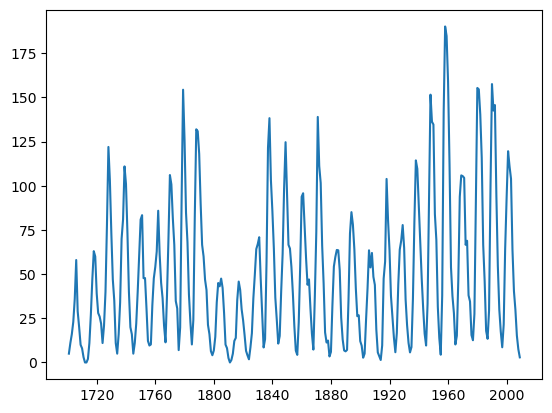

In [42]:
plt.plot(dta)

In [45]:
regular_order = (0,1,0) # Regular order for AR, Integrated, MA
seasonal_order = (1,0,1,12) # Seasonal order for AR, Integrated, MA and 12-months seasonality

SARIMA_model = SARIMAX(dta, order = regular_order, seasonal_order = seasonal_order)
SARIMA_fit = SARIMA_model.fit()


c:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
c:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)


In [47]:
print(SARIMA_fit.summary())


                                      SARIMAX Results                                       
Dep. Variable:                          SUNACTIVITY   No. Observations:                  309
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood               -1401.911
Date:                              Sat, 08 Jul 2023   AIC                           2809.822
Time:                                      22:52:13   BIC                           2821.012
Sample:                                  12-31-1700   HQIC                          2814.297
                                       - 12-31-2008                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.1771      0.234      0.756      0.450      -0.282       0.636
ma.S.L12       0.12